In [136]:
import tensorflow as tf
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from keras.models import Model
from keras.losses import BinaryCrossentropy, Loss
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.metrics import BinaryAccuracy
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from albumentations import CenterCrop, HorizontalFlip, VerticalFlip, RandomRotate90, RandomCrop

(224, 224)


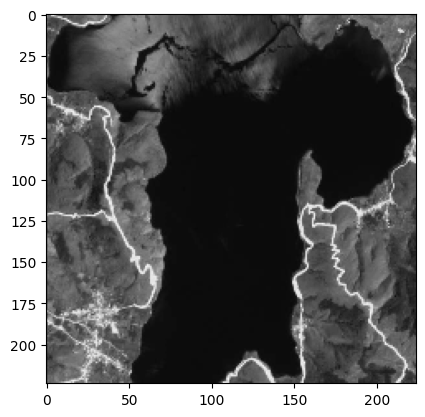

In [150]:
image = cv2.imread('./dataset/train_img/water_body_100.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))/225
# image = np.expand_dims(image, -1)/255
# image = np.array(image, dtype=np.uint8)
print(image.shape)
plt.imshow(image, cmap='gray')

(224, 224, 1)


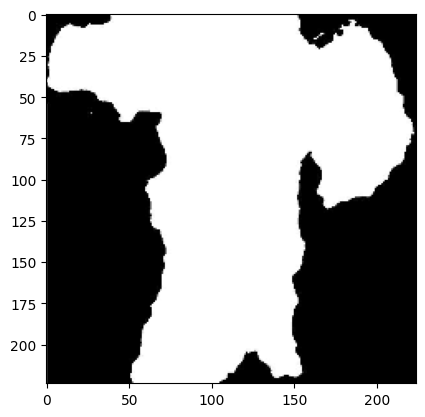

In [151]:
mask = cv2.imread('./dataset/train_mask/water_body_100.jpg')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.resize(mask, (224, 224))
mask = np.array(mask, dtype=np.uint8)
mask = np.expand_dims(mask, -1)/255
print(mask.shape)
plt.imshow(mask, cmap='gray')

In [154]:
def augmentation(orig, mask, random_crop=0.5, horizontal_flip=0.5, vertical_flip=0.5, random_rotate90=0.5):
    print('im_shape, mask_shape 1:', np.min(orig), np.min(mask))
    # aug = RandomCrop(height=192, width=192, p=random_crop)
    # augment = aug(image=orig, mask = mask)
    # new_orig = augment['image']
    # new_mask = augment['mask']
    new_orig = orig
    new_mask = mask

    aug = RandomRotate90(p=random_rotate90)
    augment = aug(image=new_orig, mask=new_mask)
    new_orig = augment['image']
    new_mask = augment['mask']

    print('im_shape, mask_shape 2: ', np.min(new_orig), np.min(new_mask))

    aug = HorizontalFlip(p=horizontal_flip)
    augment = aug(image=new_orig, mask=new_mask)
    new_orig = augment['image']
    new_mask = augment['mask']

    print('im mask 3: ', np.min(new_orig), np.min(new_mask))

    aug = VerticalFlip(p=vertical_flip)
    augment = aug(image=new_orig, mask=new_mask)
    new_orig = augment['image']
    new_mask = augment['mask']

    print('im mask 4: ', np.min(new_orig), np.min(new_mask))

    return new_orig, new_mask

In [155]:
new_orig, new_mask = augmentation(image, mask)

im_shape, mask_shape 1: 0.09777777777777778 0.0
im_shape, mask_shape 2:  0.09777777777777778 0.0
im mask 3:  0.09777777777777778 0.0
im mask 4:  0.09777777777777778 0.0


In [156]:
print(np.max(new_mask))

1.0


In [157]:
print(new_orig.shape, new_mask.shape)

(224, 224) (224, 224, 1)


In [158]:
plt.imshow(new_orig, cmap='gray')

In [159]:
plt.imshow(new_mask, cmap='gray')

In [60]:
image.dtype

dtype('uint8')

In [76]:
transform = RandomCrop(height=100, width=100, p=0.5)
res = transform(image=image, mask=mask)
plt.imshow(res['image'], cmap='gray')

In [77]:
plt.imshow(res['mask'], cmap='gray')